In [11]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from torchvision import transforms as T
from utils.vis_tool import vis_bbox
import cv2
from utils import array_tool as at
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
img = read_image('misc/1.png')
img = t.from_numpy(img)[None]

In [ ]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

# 2. model trained with torchvision pretrained model

<Axes: >

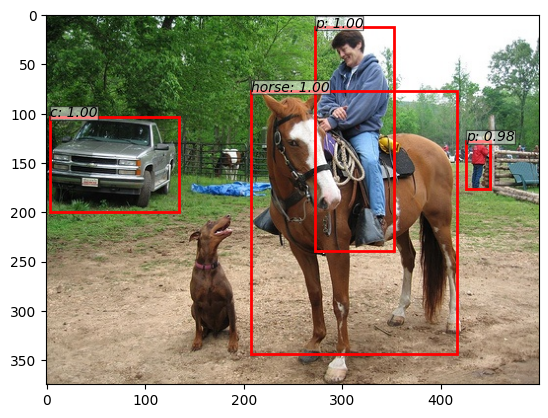

In [5]:
trainer.load('save/fasterrcnn_09060247_0.6876288313654414')
opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 3. model trained with caffe pretrained model

<Axes: >

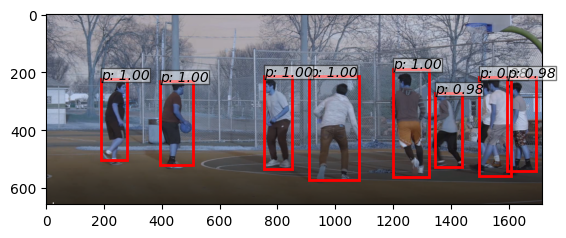

In [31]:
trainer.load('save/fasterrcnn_09071339_0.6984935332483329')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))